# Data Munging

## Load Pacakage

In [31]:
import plotly.express as px
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from sklearn.model_selection import train_test_split

## Load data

In [32]:
DF = pd.read_csv('data/steam_reviews.csv')
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [33]:
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


Check the quantile of hour played and helpful amount

In [34]:
median_helpful = DF['helpful'].median()
_1st_hour = DF['hour_played'].quantile(0.25)
_3rd_hour = DF['hour_played'].quantile(0.75)
mean_hour=DF['hour_played'].mean()
print(median_helpful, _1st_hour, _3rd_hour,mean_hour)

0.0 62.0 450.0 364.13077299829155


Generate a new label by hour_played and helpful.

In [35]:
authentic = [None]*len(DF)
for i in range(0, len(DF)):
    if DF.iloc[i,2] > median_helpful or DF.iloc[i,3] >= mean_hour:
        authentic[i] = 'TRUE'
    else:
        authentic[i] = 'FALSE'

Inset authentic label into dataframe.

In [36]:
DF.insert(8, 'authentic', pd.DataFrame(authentic))

Create a histogram for authentic.

In [37]:
fig = px.histogram(DF, x='authentic')
#fig.show()

Create a histogram for arecommendation.

In [38]:
fig = px.histogram(DF, x='recommendation')
#fig.show()

Create a histogram for authentic and recommendation.

In [39]:
fig = px.histogram(DF, x='recommendation',color="authentic", title = 'Distribution of Labels',
                   color_discrete_sequence=["lightgreen", "lightskyblue", "lightsalmon"])
#fig.show()
fig.write_html("proposal_distribution of labels.html")

Create a function to clean text.

In [40]:
def preprocess(str_arg):
        cleaned_str=re.sub('[^a-z\s]+',' ',str(str_arg), flags=re.IGNORECASE) #every char except alphabets is replaced
        cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
        cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
        
        return cleaned_str # returning the preprocessed string

Clean text.

In [41]:
DF_len = [None]*len(DF)
for i in range(0, len(DF)):
    DF_len[i] = len(preprocess(DF.iloc[i,6]).split(' '))
DF_len = pd.DataFrame({'length': DF_len})

Create a histogram for review length.

(array([19872., 33919., 25316., 20521., 19089., 16676., 14318., 12864.,
        11895., 11094.,  9994.,  9290.,  8611.,  8057.,  7288.,  6907.,
         6577.,  5999.,  5775.,  5446.,  5098.,  4909.,  4634.,  4287.,
         4175.,  3781.,  3784.,  3497.,  3361.,  3171.,  3134.,  3038.,
         2853.,  2729.,  2651.,  2535.,  2463.,  2295.,  2195.,  2232.,
         2088.,  2049.,  1980.,  1916.,  1893.,  1795.,  1887.,  1803.,
         1657.,     0.,  1616.,  1561.,  1547.,  1455.,  1447.,  1470.,
         1382.,  1341.,  1230.,  1185.,  1187.,  1215.,  1181.,  1152.,
         1060.,  1115.,  1036.,  1040.,   989.,   977.,   993.,   964.,
          997.,   860.,   852.,   862.,   880.,   854.,   812.,   848.,
          784.,   757.,   776.,   791.,   699.,   686.,   675.,   666.,
          653.,   651.,   629.,   624.,   621.,   566.,   595.,   646.,
          580.,   613.,   590.,   538.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 1

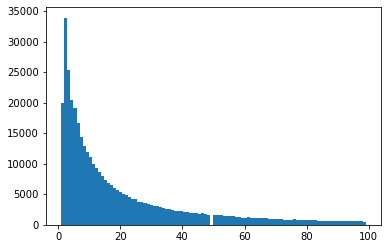

In [42]:
plt.figure()
plt.hist(DF_len[DF_len['length']<100], bins = 100)

There are a lot of reviews are less than 5. We think the review less than 5 is not useful. Hence we only keep the reviews is longer than 5 words.

In [43]:
DF_Clean = DF[DF_len['length']>=5]

Clean the text.

In [44]:
DF_Clean_list = [None] * len(DF_Clean)
for i in range(0, len(DF_Clean)):
    DF_Clean_list[i] = preprocess(DF_Clean.iloc[i,6])

Change to reviews in dataframe to be cleaned reviews.

In [45]:
DF_Clean_DF = pd.DataFrame({'review': DF_Clean_list})
DF_Clean_DF.head()

,review
0,gt played as german reich gt declare war on b...
1,very good game although a bit overpriced in my...
2,out of all the reviews i wrote this one is pro...
3,disclaimer i survivor main i play games for fu...
4,english after playing for more than two years ...


Drop the useless coulmns.

In [46]:
DF_Clean = DF_Clean.drop('review',axis=1)
DF_Clean = DF_Clean.reset_index(drop=True)
DF_Clean.insert(8,'review',DF_Clean_DF)
DF_Clean.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,authentic,review
0,2019-02-10,2,4,578,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,TRUE,gt played as german reich gt declare war on b...
1,2019-02-07,0,0,892,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,TRUE,very good game although a bit overpriced in my...
2,2018-06-14,126,1086,676,False,Recommended,Dead by Daylight,TRUE,out of all the reviews i wrote this one is pro...
3,2017-06-20,85,2139,612,False,Recommended,Dead by Daylight,TRUE,disclaimer i survivor main i play games for fu...
4,2016-12-12,4,55,2694,False,Recommended,Dead by Daylight,TRUE,english after playing for more than two years ...


Create a histogram for authentic.

In [47]:
fig = px.histogram(DF_Clean, x='authentic')
#fig.show()

Create a histogram for recommendation.

In [48]:
fig = px.histogram(DF_Clean, x='recommendation')
#fig.show()

Create a histogram for authentic and recommendation.

In [49]:
fig = px.histogram(DF_Clean, x='recommendation',color="authentic", title = 'Distribution of Labels',
                   color_discrete_sequence=["lightgreen", "lightskyblue", "lightsalmon"])
#fig.show()
fig.write_html("proposal_distribution of labels.html")

Set a clean data.

In [50]:
MYDF_Clean = pd.DataFrame({'review':DF_Clean['review'], 'recommendation':DF_Clean['recommendation'], 'authentic':DF_Clean['authentic']})
MYDF_Clean.sample(5)

,review,recommendation,authentic
57905,very addicting i love it very simple but can r...,Recommended,TRUE
73236,frustrating at times but hella fun who doesn t...,Recommended,TRUE
249828,game is good devs continue to update it at a g...,Recommended,TRUE
136440,this game gud yis yis,Recommended,FALSE
273966,stuck on joining match screen possible solutio...,Recommended,FALSE


Save clean data to local csv file.

In [51]:
MYDF_Clean.to_csv('Steam_Clean_Data.csv',index=False,sep=',')

## Train and Test Splitting.

Split data based on label recommendation.

In [52]:
Train_reco,Test_reco = train_test_split(MYDF_Clean, test_size = 0.25, stratify=MYDF_Clean['recommendation'], random_state = 580) 

Split data based on label authentic.

In [53]:
Train_auth,Test_auth = train_test_split(MYDF_Clean, test_size = 0.25, stratify=MYDF_Clean['authentic'], random_state = 580) 

In [54]:
Train_reco.to_csv('data/Train_reco.csv',index=False,sep=',')
Test_reco.to_csv('data/Test_reco.csv',index=False,sep=',')
Train_auth.to_csv('data/Train_auth.csv',index=False,sep=',')
Test_auth.to_csv('data/Test_auth.csv',index=False,sep=',')